In [28]:
#Author:cengizhunter
#year:2020
#landsat8 dataset from province Kocaeli/İzmit from Turkey between the dates 2014 and 2019

import os
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal
from gdalconst import *
from scipy import stats

%matplotlib inline

In [29]:
import matplotlib.patches as mpatches

In [3]:
os.listdir('../bireyselrasterio/bands')

['2014_B6.tif', '2014_B7.tif', '2019_B6.tif', '2019_B7.tif']

In [4]:
band6 = rasterio.open('../bireyselrasterio/bands/2019_B6.tif') #SWIR1
band7 = rasterio.open('../bireyselrasterio/bands/2019_B7.tif') #SWIR2

In [5]:
#Band 6 Height & Width
band6_height=band6.height
band6_width=band6.width
print("band6 height=",band6_height,"band6 width=",band6_width)
#Band 7 Height & Width
band7_height=band7.height
band7_width=band7.width
print("band7 height=",band7_height,"band7 width=",band7_width)

band6 height= 476 band6 width= 701
band7 height= 476 band7 width= 701


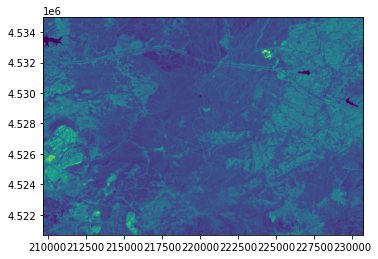

<AxesSubplot:>

In [6]:
plot.show(band6)

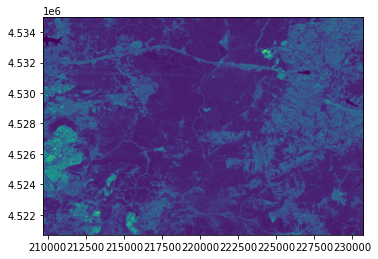

<AxesSubplot:>

In [7]:
plot.show(band7)

In [8]:
#type of raster byte
band6.dtypes[0],band7.dtypes[0]

('uint16', 'uint16')

In [9]:
#raster sytem of reference
crs=(band6.crs, band7.crs)
print(crs)
print("WGS 84 / UTM zone 36N - EPSG:32636")

(CRS.from_epsg(32636), CRS.from_epsg(32636))
WGS 84 / UTM zone 36N - EPSG:32636


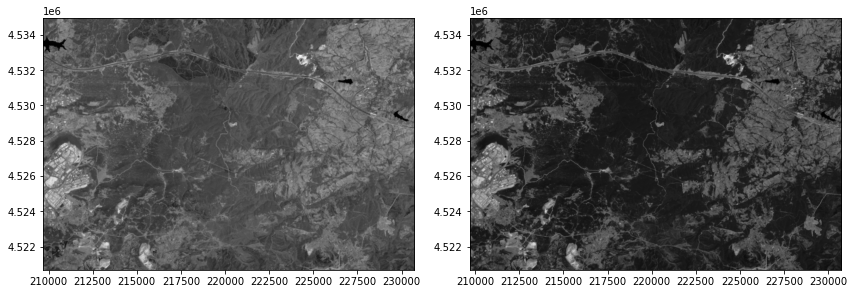

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

plot.show(band6, ax=ax1, cmap='Greys_r') #SWIR1
plot.show(band7, ax=ax2, cmap='Greys_r') #SWIR2
fig.tight_layout()

In [11]:
#generate SWIR1 and SWIR2 objects as arrays in float64 format

SWIR1 = band6.read(1).astype('float64')
SWIR2 = band7.read(1).astype('float64')


In [12]:
#NDTI calculation, empty cells or nodata cells are reported as 0
NDTI=np.where(
    (SWIR1+SWIR2)==0., 
    0, 
    (SWIR1-SWIR2)/(SWIR1+SWIR2))
NDTI[:5,:5]
#export NDTI image
NDTIImage = rasterio.open('../bireyselrasterio/Output/NDTI_2019.tif','w',driver='Gtiff',
                          width=band6.width, 
                          height = band6.height, 
                          count=1, crs=band6.crs, 
                          transform=band6.transform, 
                          dtype='float64')
NDTIImage.write(NDTI,1)
NDTIImage.close()

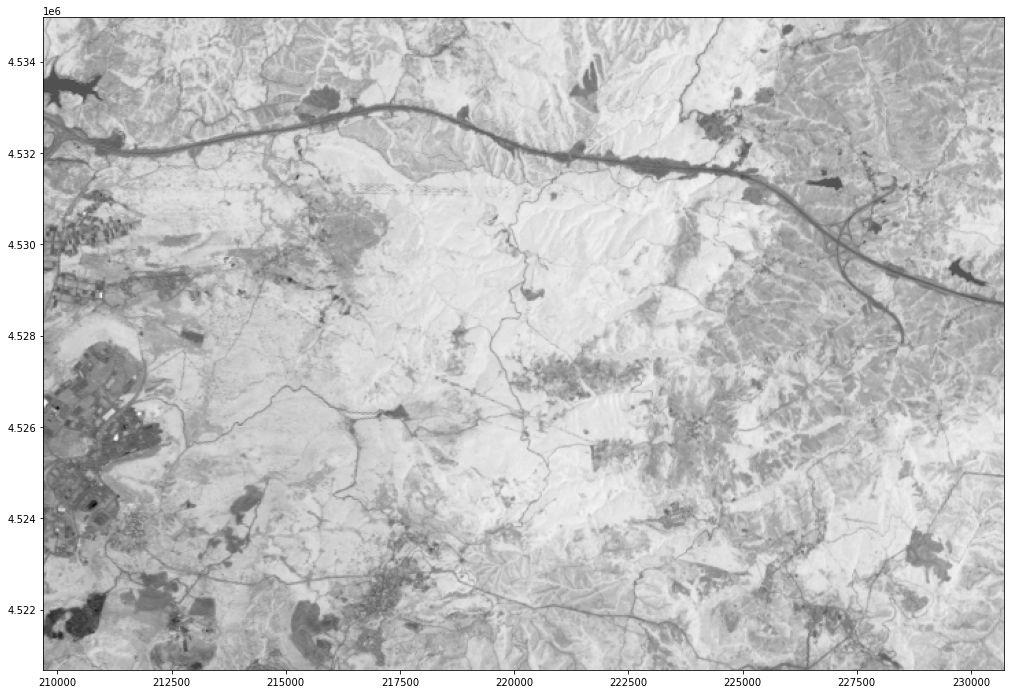

<AxesSubplot:>

In [13]:
#plot NDTI
NDTI = rasterio.open('../bireyselrasterio/Output/NDTI_2019.tif')
fig = plt.figure(figsize=(18,12))
plot.show(NDTI, cmap='gray')

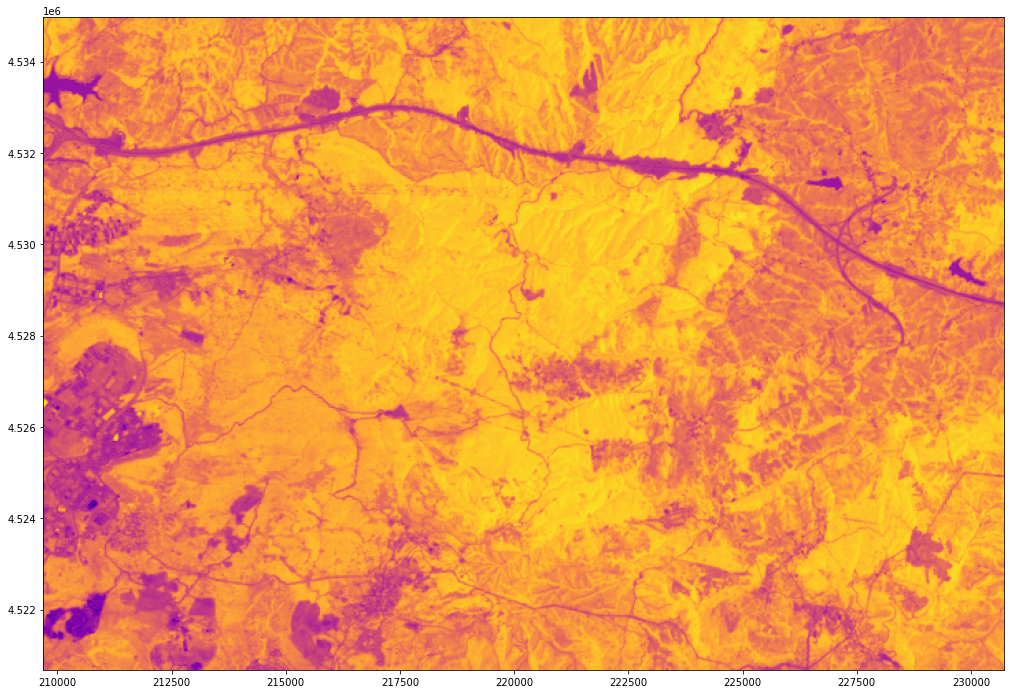

<AxesSubplot:>

In [14]:
#plot NDTI
NDTI = rasterio.open('../bireyselrasterio/Output/NDTI_2019.tif')
fig = plt.figure(figsize=(18,12))
plot.show(NDTI, cmap='plasma')

In [15]:
#for 2014 NDTI

In [16]:
band6 = rasterio.open('../bireyselrasterio/bands/2014_B6.tif') #SWIR1
band7 = rasterio.open('../bireyselrasterio/bands/2014_B7.tif') #SWIR2

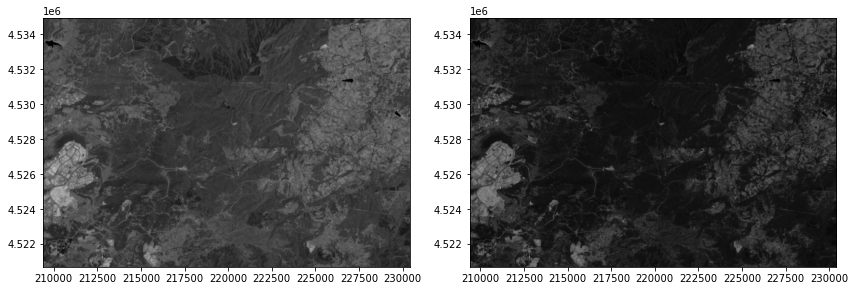

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

plot.show(band6, ax=ax1, cmap='Greys_r') #SWIR1
plot.show(band7, ax=ax2, cmap='Greys_r') #SWIR2
fig.tight_layout()

In [18]:
#generate SWIR1 and SWIR2 objects as arrays in float64 format

SWIR1 = band6.read(1).astype('float64')
SWIR2 = band7.read(1).astype('float64')


In [19]:
#NDTI calculation, empty cells or nodata cells are reported as 0
NDTI=np.where(
    (SWIR1+SWIR2)==0., 
    0, 
    (SWIR1-SWIR2)/(SWIR1+SWIR2))
NDTI[:5,:5]
#export NDTI image
NDTIImage = rasterio.open('../bireyselrasterio/Output/NDTI_2014.tif','w',driver='Gtiff',
                          width=band6.width, 
                          height = band6.height, 
                          count=1, crs=band6.crs, 
                          transform=band6.transform, 
                          dtype='float64')
NDTIImage.write(NDTI,1)
NDTIImage.close()

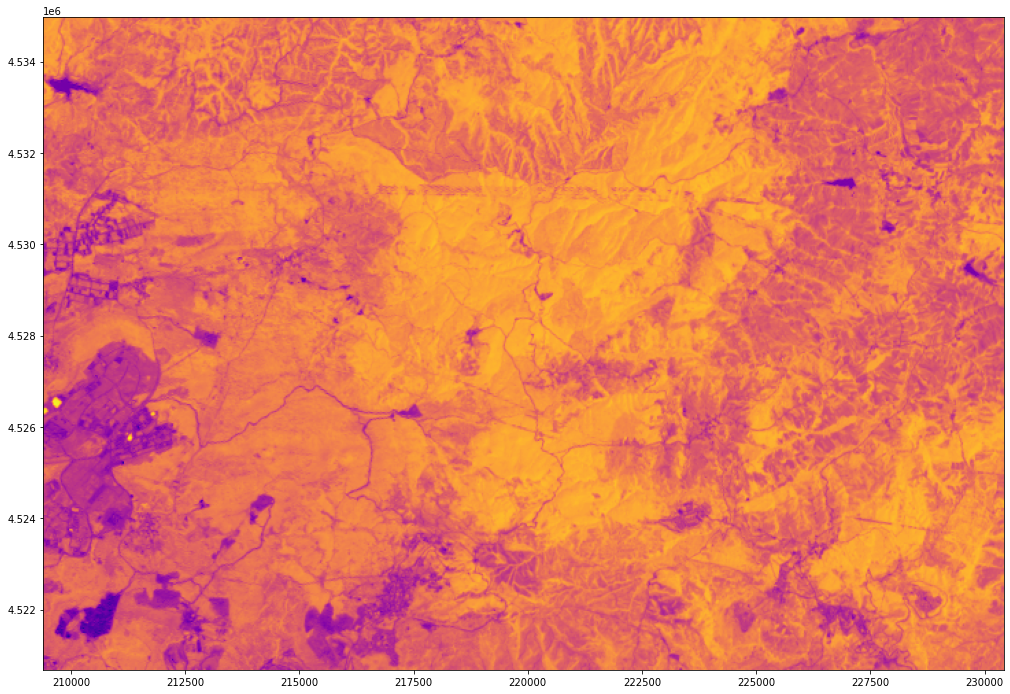

<AxesSubplot:>

In [20]:
#plot NDTI
NDTI = rasterio.open('../bireyselrasterio/Output/NDTI_2014.tif')
fig = plt.figure(figsize=(18,12))
plot.show(NDTI, cmap='plasma')

In [21]:
os.listdir('../bireyselrasterio/output')

['mode_threshold_square_ndtidif.png',
 'ndtidif.png',
 'NDTI_2014.tif',
 'NDTI_2019.tif',
 'square_ndtidif.png',
 'threshold_square_ndtidif.png']

In [22]:
filename_t1 = "../bireyselrasterio/output/NDTI_2019.tif"
filename_t2 = "../bireyselrasterio/output/NDTI_2014.tif"

In [23]:
rows = 476
columns = 701
figure_border = 25
# load the datasets
dataset_t1 = gdal.Open(filename_t1, GA_ReadOnly) 
dataset_t2 = gdal.Open(filename_t2, GA_ReadOnly) 
# get the reference for the first bands of t1 and t2
ndti_t1 = dataset_t1.GetRasterBand(1)
ndti_t2 = dataset_t2.GetRasterBand(1)

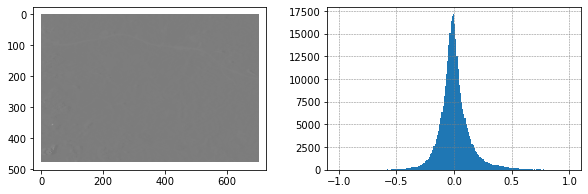

In [24]:
array_t1 = ndti_t1.ReadAsArray()[0:rows, 0:columns].astype(float)
array_t2 = ndti_t2.ReadAsArray()[0:rows, 0:columns].astype(float)
array_ndtidif = (array_t2 - array_t1) / (array_t2 + array_t1)
# create figure to display original ndtidif= NDTI difference
output_fig, (ndtidif_ax, histogram_ax) = plt.subplots(figsize=(10, 3), ncols=2)
ndtidif_ax.imshow(array_ndtidif, cmap="gray")
ndtidif_ax.set_xlim([0 - figure_border, columns + figure_border])
ndtidif_ax.set_ylim([rows + figure_border, 0 - figure_border])
histogram_ax.hist(array_ndtidif.ravel(), bins=200, range=(-1.0, 1.0))
histogram_ax.grid(b=True, color='gray', linestyle='--', linewidth=0.5);
output_fig.savefig("output/ndtidif.png", format='png', dpi=200)
plt.show()

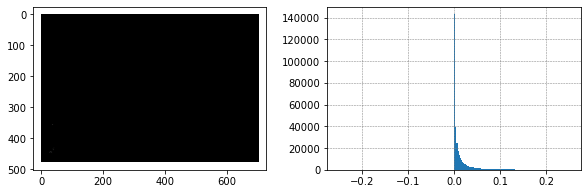

In [25]:
# compute square of ndtidif
array_square_ndtidif = array_ndtidif * array_ndtidif
# create figure to display square of ndtidif
output_fig, (square_ndtidif_ax, histogram_ax) = plt.subplots(figsize=(10, 3), ncols=2)
square_ndtidif_ax.imshow(array_square_ndtidif, cmap="gray")
square_ndtidif_ax.set_xlim([0 - figure_border, columns + figure_border])
square_ndtidif_ax.set_ylim([rows + figure_border, 0 - figure_border])

histogram_ax.hist(array_square_ndtidif.ravel(), bins=200, range=(-0.25, 0.25))
histogram_ax.grid(b=True, color='gray', linestyle='--', linewidth=0.5);
output_fig.savefig("output/square_ndtidif.png", format='png', dpi=200)
plt.show()

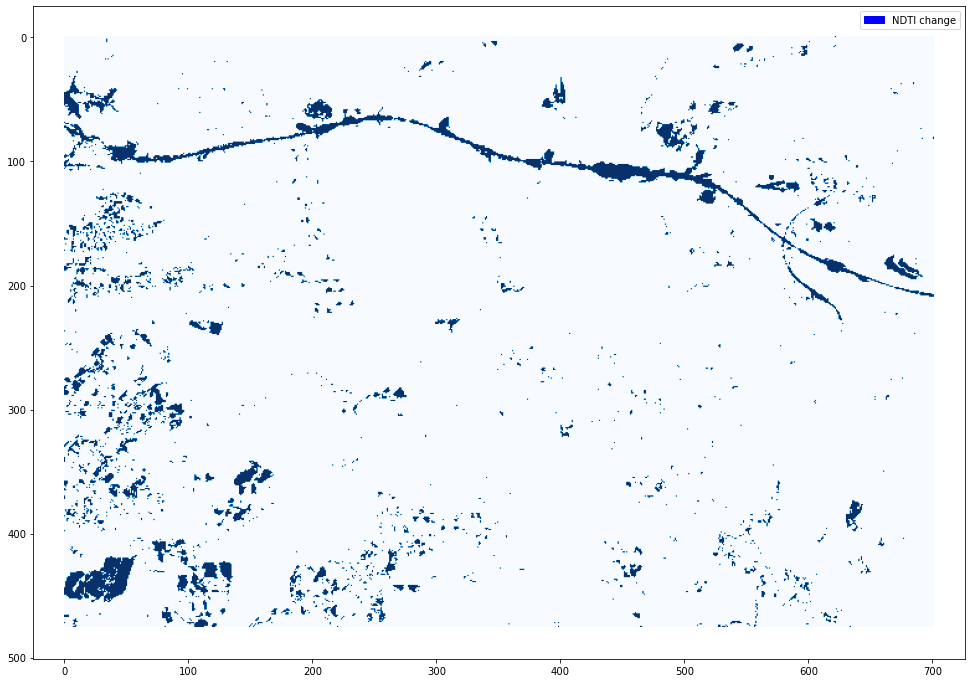

In [26]:

# apply threshold to highlight change detection
threshold = 0.1
threshold_array_square_ndtidif = array_square_ndtidif > threshold
# create figure to display change detection
blue_patch = mpatches.Patch(color='blue', label="NDTI change")
output_fig, threshold_ax = plt.subplots(figsize=(18, 12), ncols=1)
threshold_ax.legend(handles=[blue_patch])
threshold_ax.imshow(threshold_array_square_ndtidif, cmap="Blues")
threshold_ax.set_xlim([0 - figure_border, columns + figure_border])
threshold_ax.set_ylim([rows + figure_border, 0 - figure_border])
output_fig.savefig("output/threshold_square_ndtidif.png", format='png', dpi=200)
plt.show()

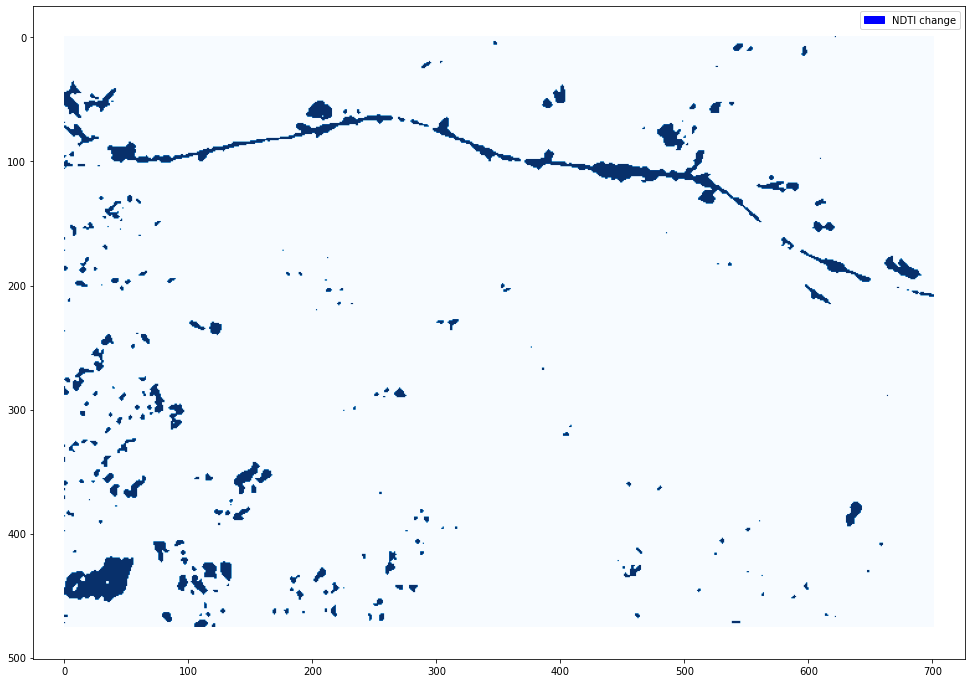

In [27]:
# apply 3x3 mode filter to remove noise

mode_threshold_array_square_ndtidif = threshold_array_square_ndtidif
for i in range(1,rows):
	for j in range(1,columns):
		values = np.array(threshold_array_square_ndtidif[i-1:i+2, j-1:j+2])
		mode_threshold_array_square_ndtidif[i, j] = stats.mode(values.ravel())[0][0]
# create figure to display filtered change detection
blue_patch = mpatches.Patch(color='blue', label="NDTI change")
output_fig, threshold_ax = plt.subplots(figsize=(18, 12), ncols=1)
threshold_ax.legend(handles=[blue_patch])
threshold_ax.imshow(mode_threshold_array_square_ndtidif, cmap="Blues")
threshold_ax.set_xlim([0 - figure_border, columns + figure_border])
threshold_ax.set_ylim([rows + figure_border, 0 - figure_border])
output_fig.savefig("output/mode_threshold_square_ndtidif.png", format='png', dpi=200)
plt.show()